# **Fake News Detection**
***

## **Introduction**

In the digital era, encountering deceptive or inaccurate content has become increasingly common. This phenomenon has been particularly evident in recent events such as the ongoing COVID-19 pandemic, US elections, and recent military conflicts like Russia-Ukraine and Israel-Hamas. This type of misinformation, often called **"fake news"**, is intentionally fabricated or deceptive content presented as authentic news. It is distributed through various channels such as media and social networks, which mimic the distribution methods of legitimate news sources.
In the current digital landscape, it has become a significant problem, in contrast to the traditional news channels. In the past, newspapers and television had a limited number of distribution channels, which resulted in strict fact-checking and the provision of accurate information. However, with the internet becoming the primary source of information, the ease of sharing content has increased significantly, leading to a rise in unverified information.

This surge in fake news poses a serious problem due to its potential to deceive and manipulate public opinion. False narratives can impact political processes public health, and even contribute to social unrest. The lack of strict editorial oversight and the rapid dissemination of information on digital platforms exacerbate the challenge of distinguishing between genuine and misleading content.

Fortunately, advancements in data science offer a promising solution to the problem of fake news. Today, data analytics tools and sophisticated algorithms can analyze vast amounts of data to detect patterns and anomalies that may indicate misinformation.  
My project aims to use these algorithms to build a predictive model that can determine whether a piece of news is **true** or **false**.  
The goal of developing such a tool is to not only improve the ability to identify fake news but also to contribute to larger efforts to combat the spread of misinformation.   
This project aligns with the growing need for technologically driven solutions to address the challenges posed by fake news in the contemporary information landscape.

## **Data Collection**

**Source**: kaggle.com  
**Link**: https://www.kaggle.com/datasets/c010104/fakenewsdetectiondataset?select=Fake.csv

In [1]:
%pip install seaborn

In [2]:
# Import libraries for data manipulation
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for text preprocessing (NLP)
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Import libraries for transformation (NLP)
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

# Import libraries for ML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

[nltk_data] Error loading punkt: <urlopen error [Errno 23] Host is
[nltk_data]     unreachable>
[nltk_data] Error loading stopwords: <urlopen error [Errno 23] Host is
[nltk_data]     unreachable>
[nltk_data] Error loading wordnet: <urlopen error [Errno 23] Host is
[nltk_data]     unreachable>


In [5]:
# read csv
df_fake = pd.read_csv('Project1/Datasets/Fake.csv')
df_true = pd.read_csv('Project1/Datasets/True.csv')

## **EDA- Exploratory Data Analysis**

Before working with the data, it's essential to understand the dataset's content and nature. Exploratory Data Analysis (EDA) serves this purpose by revealing key patterns and insights within the data. This includes understanding the data structure, identifying patterns, and uncovering potential data issues. The EDA stage will involve the following steps:
1. Displaying general data.
2. Displaying core distribution




### **Displaying general data**

In [6]:
# add a new col for each df, representing the type of data
df_fake["label"] =  0 # false
df_true["label"] = 1 # true

# concat the df
df= pd.concat([df_fake, df_true], ignore_index=True)

In [7]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

# print top records in df (a look of how the data looks like)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
# print df info (cols, types and how many non-null values there are)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [9]:
# print statistical data
df.describe(include="all")

,title,text,subject,date,label
count,44898,44898,44898,44898,44898.000000
unique,38729,38646,8,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,627,11272,182,NaN
mean,NaN,NaN,NaN,NaN,0.477015
std,NaN,NaN,NaN,NaN,0.499477
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1.000000


**Obeservations-**

* Data frame "df" info-
  * Number of columns: 5.  
  * Number of records: 44898.  
  * Number of categorical features: 4/5 columns ("object").  
  * Number of categorical features: 1/5 columns ("int64").

* Potential inaccuracies and issues including-
  * Duplicates entries- using the method "describe()" on the dataframe highlights the presence of duplicate entries.  
  The observation suggests that there are more records ("count") than unique values ("unique") in columns "text" and "title".  
  This is a concern as duplicate records can potentially bias the algorithm's results. Resolving this issue is essential for maintaining the accuracy of the analysis and will be handled later.
  * Incorrect data types- column "date" displays an incorrect data type compared its values.

### **Displaying core distributions**


#### **Selected columns distribution**


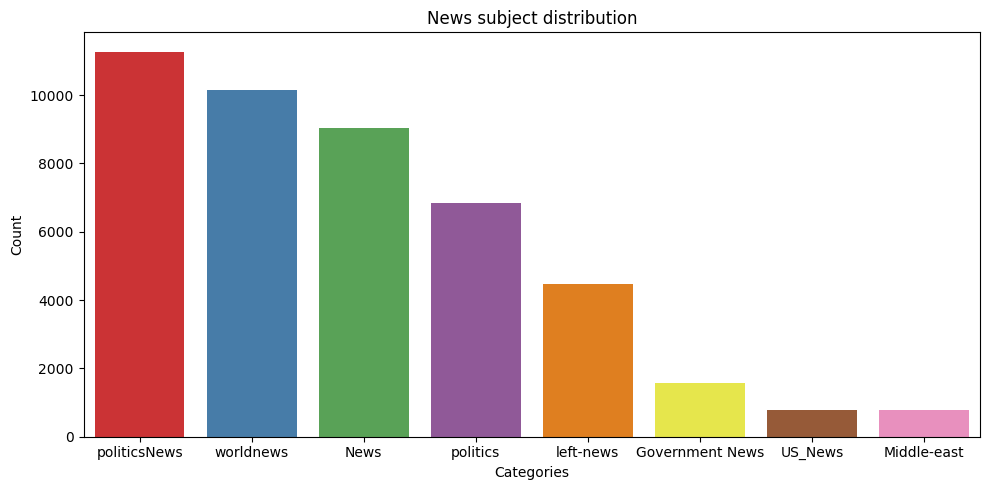

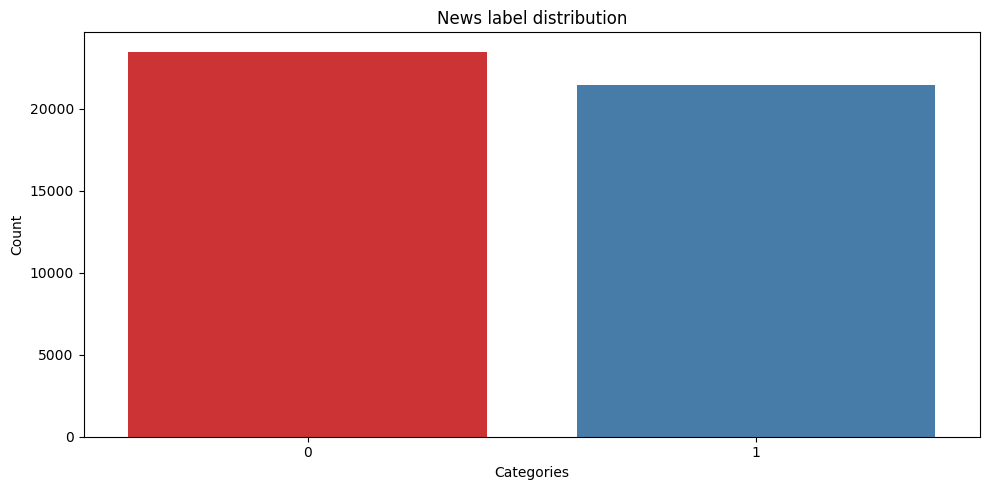

In [10]:
# select cols
selected_cols = ['subject', 'label']

# create titles for barplots
titles = ["News subject distribution", "News label distribution"]

# loop through every col in "selected_cols"
for col, title in zip(selected_cols, titles):

  # apply "value_counts"
  df_vc =  df[col].value_counts()

  # create barplot
  plt.figure(figsize=(10, 5))
  colors = sns.color_palette('Set1', n_colors=len(df_vc))
  barplot = sns.barplot(x=df_vc.index, y=df_vc, hue=df_vc.index, palette=colors, legend=False)
  plt.title (title)
  plt.xlabel('Categories')
  plt.ylabel('Count')
  plt.tight_layout()
  plt.show()

**Obeservations-**

* News subject distribution-
  *   "politicsNews" is the most frequently covered category, with 11,272 articles, indicating a focus on political and governmental news. "Worldnews" follows with 10,145 articles, while "News" has 9,050.
  *  Some categories, such as "US_News" and "Middle-East," indicate a geographic emphasis.
  * However, there is an imbalance in coverage, with some categories receiving significantly more articles than others.
* News label distribution-
  * Shows that there are more "fake news" than true news.

#### **Word cloud**

 **"Word cloud"** is a visual representation of the words used
  in a text, where the most common words are emphasized by their larger size.  
  It offers a simple and quick way to get an idea of what a text is about, highlighting prominent terms, themes, and keywords through their frequency. By looking at a word cloud, we can easily identify which words are used the most and get insights into the most significant linguistic patterns in the text. Essentially, it condenses a large amount of textual information into a visually appealing summary, making it easier to understand the main ideas conveyed in the text.

  In this case, using "word cloud" will help me find out which words or topics are repeated in the context of "fake news".

In [11]:
def word_cloud(my_df, col):
  """Function display word-cloud of given column.
  param my_df: selected df.
  param col: textual column.
  return: nan.
  """
  # create a single string for al the "text" data
  text_data = ' '.join(my_df[col].astype(str))

  # split "text_data" into words
  tokens = word_tokenize(text_data)

  # remove stop words
  filtered_tokens = []
  stop_words = set(STOPWORDS)
  for word in tokens:

    # if word is not a number and its lower case doesnt appeare in "stop_words" append it to "filtered_tokens"
    if word.isalpha() and word.lower() not in stop_words:
      filtered_tokens.append(word.lower())

  # join the filtered tokens back into a single string
  filtered_text = ' '.join(filtered_tokens)

  # generate worldcolud
  wc = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

  # display worldcluod
  plt.figure(figsize=(12, 6))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

In [23]:
# merege col "text" and col "title" into a new col
df_fake["content"] = df_fake["title"] +  df_fake["text"]

# apply "word_cloud" on "df_fake"
word_cloud(df_fake, "content")

<class 'LookupError'>: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/pyodide/nltk_data'
    - '/nltk_data'
    - '/share/nltk_data'
    - '/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - 'C:\\Users\\תקוה\\Downloads\\punkt'
    - 'C:\\Users\\תקוה\\Downloads\\stopwords'
    - 'C:\\Users\\תקוה\\Downloads\\wordnet_ic'
    - ''
**********************************************************************


**Obeservations-**  
Examining the word cloud reveals that the most common themes in the fake news dataset revolve around **prominent figures in the US government**, specifically **Donald Trump** and **Hillary Clinton**.  
The primary focus of the fake news content appears to be on **political news in the US**.

In [20]:
# nltk.data.path.append('C:\\Users\\תקוה\\Downloads\\punkt')

In [21]:
# nltk.data.path.append('C:\\Users\\תקוה\\Downloads\\stopwords')

In [22]:
# nltk.data.path.append('C:\\Users\\תקוה\\Downloads\\wordnet_ic')